In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df = df[df.groupby('UserId').UserId.transform('count') > 5]
df = df[df.groupby('ProductId').ProductId.transform('count') > 5]

In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,167191.000000,167191.000000,167191.000000,167191.000000,1.671910e+05
mean,283272.358620,1.816874,2.320729,4.188437,1.294948e+09
std,163389.331289,9.470956,10.045209,1.233022,4.630982e+07
min,33.000000,0.000000,0.000000,1.000000,9.657792e+08
25%,141801.500000,0.000000,0.000000,4.000000,1.268266e+09
50%,286276.000000,0.000000,1.000000,5.000000,1.308701e+09
75%,420366.500000,1.000000,2.000000,5.000000,1.331338e+09
max,568272.000000,559.000000,562.000000,5.000000,1.351210e+09


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...
39,40,B001EO5QW8,AO80AC8313NIZ,kYpondman,0,0,5,1317168000,Wife's favorite Breakfast,I ordered this for my wife as it was reccomend...
40,41,B001EO5QW8,AQCY5KRO7489S,Garrett,0,0,5,1303430400,Why wouldn't you buy oatmeal from Mcanns? Tast...,The variety packs taste great!<br /><br />I ha...
43,44,B001EO5QW8,A17DW6SUOC70DJ,Mother of 9,0,0,5,1255392000,Good Hot Breakfast,McCann's Oatmeal is a good quality choice. Ou...
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...


In [6]:
df['Content'] = df.Summary + ' ' + df.Text
df['HelpfulScore'] = df.HelpfulnessNumerator/df.HelpfulnessDenominator

df = df.drop(['Summary', 'Text', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'ProfileName', 'Time', 'Id', 'HelpfulScore'], axis = 1).reset_index(drop = True)

In [61]:
df['Sentiment'] = df.Score.apply(lambda x: -1 if x < 3 else (0 if x==3 else 1))

In [62]:
df.head()

,ProductId,UserId,Score,Content,Sentiment
0,B001EO5QW8,AOVROBZ8BNTP7,4,Best of the Instant Oatmeals McCann's Instant ...,1
1,B001EO5QW8,AO80AC8313NIZ,5,Wife's favorite Breakfast I ordered this for m...,1
2,B001EO5QW8,AQCY5KRO7489S,5,Why wouldn't you buy oatmeal from Mcanns? Tast...,1
3,B001EO5QW8,A17DW6SUOC70DJ,5,Good Hot Breakfast McCann's Oatmeal is a good ...,1
4,B001EO5QW8,A2G7B7FKP2O2PU,5,Great taste and convenience We really like the...,1


In [64]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [65]:
training_content, testing_content, training_labels, testing_labels = train_test_split(df['Content'], df['Sentiment'], test_size=0.1, random_state=42)

training_sentences = []
testing_sentences = []

for row in training_content:
    training_sentences.append(str(row))

for row in testing_content:
    testing_sentences.append(str(row))

In [66]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [67]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

word_index

{'<OOV>': 1,
 'the': 2,
 'i': 3,
 'a': 4,
 'and': 5,
 'to': 6,
 'it': 7,
 'of': 8,
 'br': 9,
 'is': 10,
 'this': 11,
 'for': 12,
 'in': 13,
 'my': 14,
 'that': 15,
 'but': 16,
 'not': 17,
 'are': 18,
 'with': 19,
 'you': 20,
 'have': 21,
 'they': 22,
 'like': 23,
 'as': 24,
 'was': 25,
 'these': 26,
 'so': 27,
 'on': 28,
 'good': 29,
 'coffee': 30,
 'them': 31,
 'great': 32,
 'taste': 33,
 'be': 34,
 'or': 35,
 'food': 36,
 'one': 37,
 'flavor': 38,
 'if': 39,
 'just': 40,
 'very': 41,
 'at': 42,
 'tea': 43,
 'all': 44,
 'product': 45,
 'more': 46,
 'love': 47,
 "it's": 48,
 'me': 49,
 'can': 50,
 'has': 51,
 'from': 52,
 'would': 53,
 'when': 54,
 'will': 55,
 'than': 56,
 'we': 57,
 'no': 58,
 'had': 59,
 'out': 60,
 'too': 61,
 'really': 62,
 'other': 63,
 'some': 64,
 'dog': 65,
 'about': 66,
 'up': 67,
 'get': 68,
 'only': 69,
 "don't": 70,
 'much': 71,
 'your': 72,
 'an': 73,
 'little': 74,
 'also': 75,
 'amazon': 76,
 'she': 77,
 'because': 78,
 'best': 79,
 'which': 80,
 'do': 

In [52]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),

    tf.keras.layers.GlobalAveragePooling1D(),

    tf.keras.layers.Dense(6, activation = 'relu'),

    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
    ])

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           640000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [72]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [74]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
4703/4703 [==============================] - 30s 6ms/step - loss: -19136.4160 - accuracy: 0.7199 - val_loss: -14979.9766 - val_accuracy: 0.6902
Epoch 2/20
4703/4703 [==============================] - 18s 4ms/step - loss: -21267.4180 - accuracy: 0.7194 - val_loss: -16601.1582 - val_accuracy: 0.6956
Epoch 3/20
4703/4703 [==============================] - 18s 4ms/step - loss: -23552.5605 - accuracy: 0.7195 - val_loss: -18331.1387 - val_accuracy: 0.7073
Epoch 4/20
4703/4703 [==============================] - 18s 4ms/step - loss: -25991.7891 - accuracy: 0.7197 - val_loss: -20208.3223 - val_accuracy: 0.6864
Epoch 5/20
4703/4703 [==============================] - 20s 4ms/step - loss: -28586.7363 - accuracy: 0.7196 - val_loss: -22181.1973 - val_accuracy: 0.6903
Epoch 6/20
4703/4703 [==============================] - 22s 5ms/step - loss: -31364.5781 - accuracy: 0.7196 - val_loss: -24323.0977 - val_accuracy: 0.6882
Epoch 7/20
4703/4703 [==============================] - 21s 4ms/step -

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))


Text(0.5, 1.0, 'Training and validation accuracy')

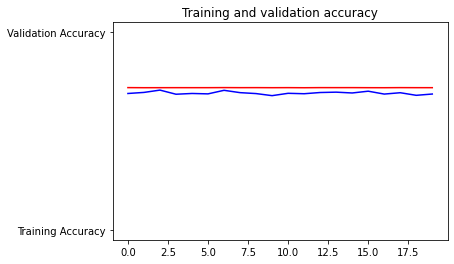

In [76]:
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')

Text(0.5, 1.0, 'Training and validation loss')

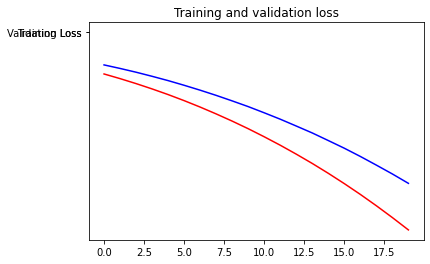

In [77]:
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')